In [3]:
import pandas as pd
Nifty_data=pd.read_csv("E:/summer/NIFTY50.csv",parse_dates=['Date'])

In [4]:
Nifty_data['day']=Nifty_data['Date'].map(lambda x:x.day)

In [5]:
Nifty_data['month']=Nifty_data['Date'].map(lambda x:x.month)

In [6]:
Nifty_data['year']=Nifty_data['Date'].map(lambda x:x.year)

In [7]:
All_returns=list()
for i in range(2010,2019):
    for j in range(1,13):
        Open=Nifty_data.Open[(Nifty_data['year']==i) & (Nifty_data['month']==j)]
        if(Open.empty):
            continue;
        else :
            Open.index=range(1,len(Nifty_data[(Nifty_data['year']==i) & (Nifty_data['month']==j)])+1)
            returns=((Open[len(Open)]-Open[1])/Open[1])*100
            All_returns.append(returns)

In [8]:
All_mov_avg=list()
for i in range(2010,2019):
    for j in range(1,13):
        Open=Nifty_data.Open[(Nifty_data['year']==i) & (Nifty_data['month']==j)]
        if(Open.empty):
                continue;
        else:
                mov=list(Open)
                for k in range(len(mov)):
                               All_mov_avg.append(sum(mov[k:k+5])/5)

In [9]:
All_r=pd.Series(All_returns)
All_r.index=pd.date_range('Apr 2010',freq='M',periods=96).to_period()
All_r.head(10)

2010-04     0.095253
2010-05    -3.832601
2010-06     3.303023
2010-07     1.813801
2010-08     0.819436
2010-09    10.888295
2010-10    -0.151734
2010-11    -4.607455
2010-12     3.987396
2011-01   -11.734615
Freq: M, dtype: float64

In [10]:
All_mov=pd.Series(All_mov_avg)
All_mov.head(10)

0    5330.45
1    5341.09
2    5353.64
3    5347.88
4    5339.40
5    5318.82
6    5314.15
7    5284.98
8    5262.87
9    5247.93
dtype: float64

In [11]:
Nifty_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),day,month,year
0,2010-04-01,5249.20,5298.60,5249.20,5290.50,127773261,5365.11,1,4,2010
1,2010-04-05,5291.40,5377.55,5291.40,5368.40,132419861,5762.97,5,4,2010
2,2010-04-06,5369.65,5388.65,5351.70,5366.00,147051901,5746.95,6,4,2010
3,2010-04-07,5365.70,5399.65,5345.05,5374.65,166790249,6530.95,7,4,2010
4,2010-04-08,5376.30,5383.65,5290.25,5304.45,156785881,5830.63,8,4,2010


In [12]:
Nifty_data.index=Nifty_data['Date']

In [13]:
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DD0FACC18>,
      dtype=object)

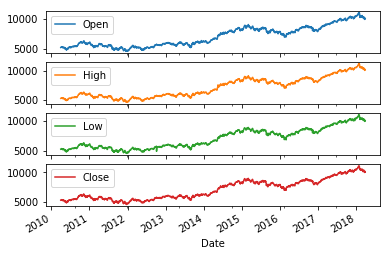

In [14]:
Nifty_data[['Open','High','Low','Close']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DD1457E80>,
      dtype=object)

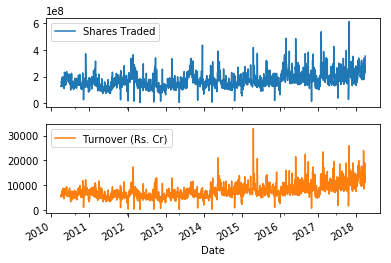

In [15]:
Nifty_data[['Shares Traded','Turnover (Rs. Cr)']].plot(subplots=True)

In [16]:
win_size=[7,30,90,365]

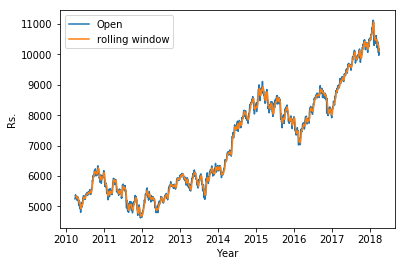

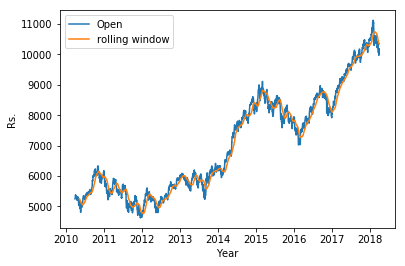

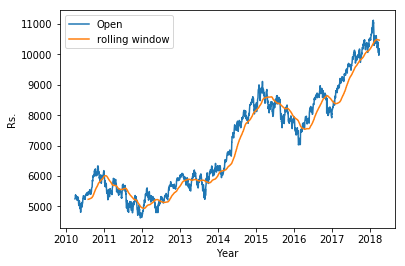

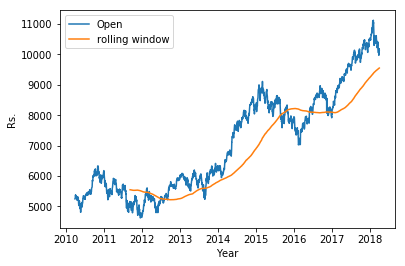

In [17]:
for i in win_size:
    r1=Nifty_data[['Open','High','Low','Close']].rolling(window=i)
    plt.plot(Nifty_data[['Open']],label='Open')
    plt.plot(r1.mean()['Open'],label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()


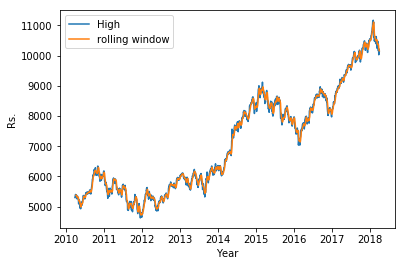

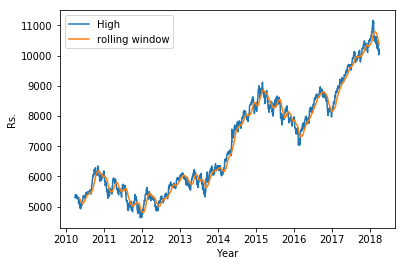

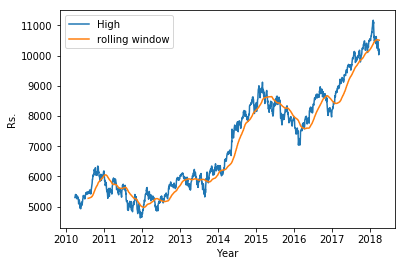

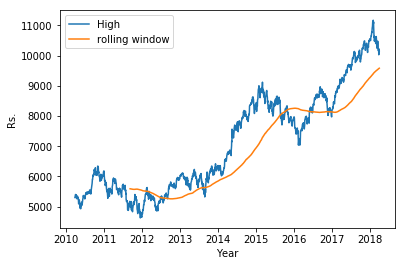

In [18]:
for i in win_size:
    r1=Nifty_data[['Open','High','Low','Close']].rolling(window=i)
    plt.plot(Nifty_data[['High']],label='High')
    plt.plot(r1.mean()['High'],label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

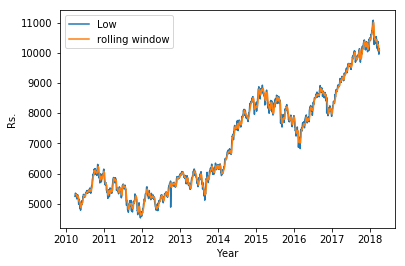

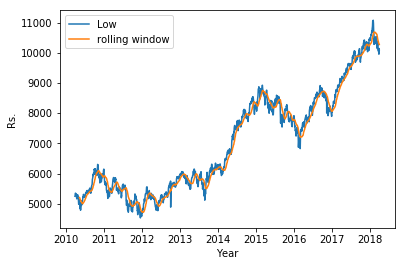

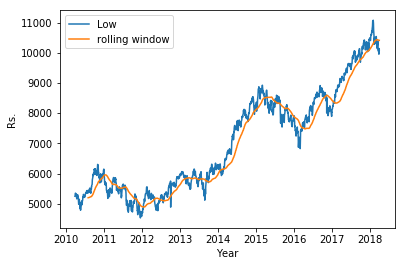

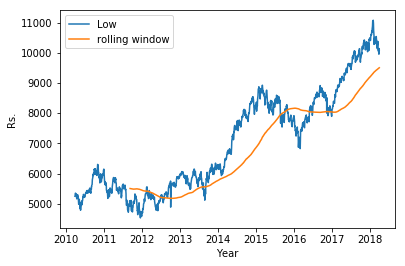

In [19]:
for i in win_size:
    r1=Nifty_data[['Open','High','Low','Close']].rolling(window=i)
    plt.plot(Nifty_data[['Low']],label='Low')
    plt.plot(r1.mean()['Low'],label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

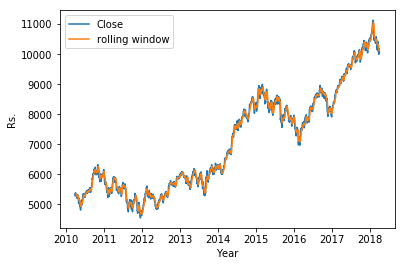

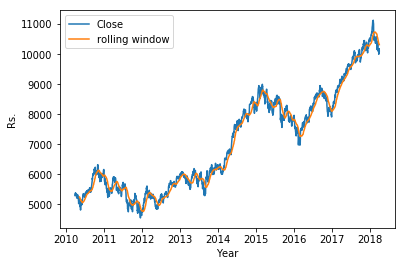

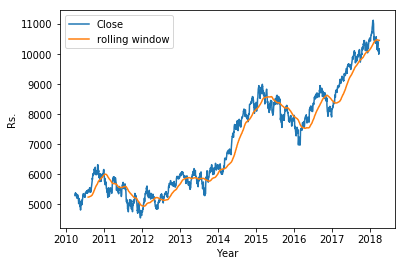

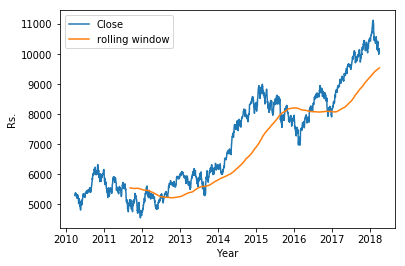

In [20]:
for i in win_size:
    r1=Nifty_data[['Open','High','Low','Close']].rolling(window=i)
    plt.plot(Nifty_data[['Close']],label='Close')
    plt.plot(r1.mean()['Close'],label='rolling window')
    plt.xlabel('Year')
    plt.ylabel('Rs.')
    plt.legend()
    plt.show()

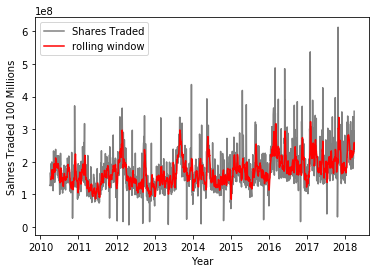

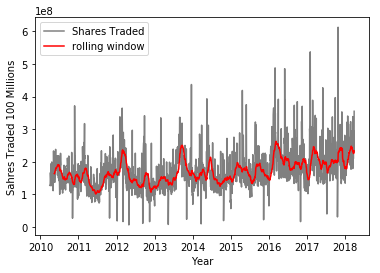

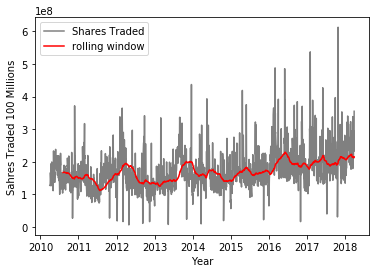

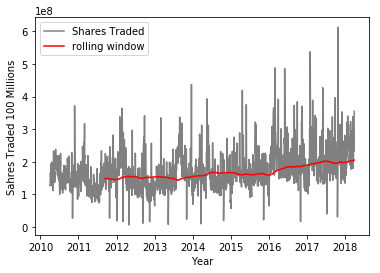

In [21]:
for i in win_size:
    r2=Nifty_data['Shares Traded'].rolling(window=i)
    plt.plot(Nifty_data['Shares Traded'],color='grey')
    plt.plot(r2.mean(),label='rolling window',color='red')
    plt.xlabel('Year')
    plt.ylabel('Sahres Traded 100 Millions')
    plt.legend()
    plt.show()

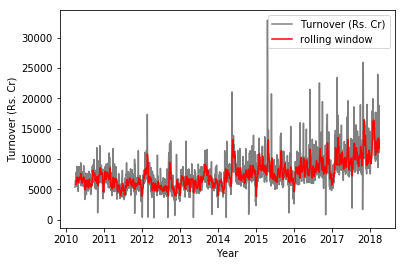

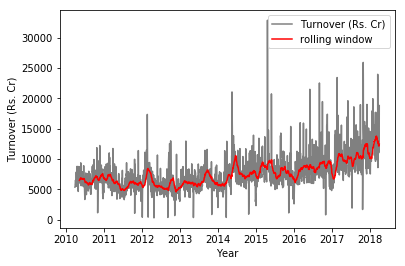

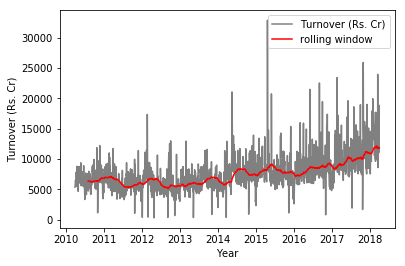

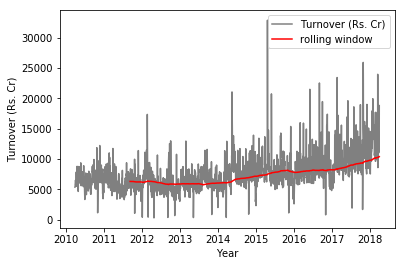

In [22]:
for i in win_size:
    r2=Nifty_data['Turnover (Rs. Cr)'].rolling(window=i)
    plt.plot(Nifty_data['Turnover (Rs. Cr)'],color='grey')
    plt.plot(r2.mean(),label='rolling window',color='red')
    plt.xlabel('Year')
    plt.ylabel('Turnover (Rs. Cr)')
    plt.legend()
    plt.show()

In [29]:
from statsmodels.tsa import stattools

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
acf_Open=stattools.acf(Nifty_data['Open'])

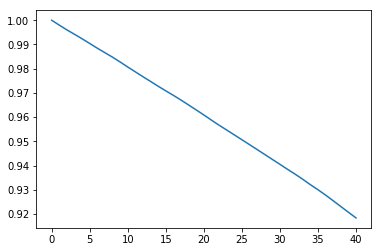

In [49]:
plt.plot(acf_Open)
plt.show()

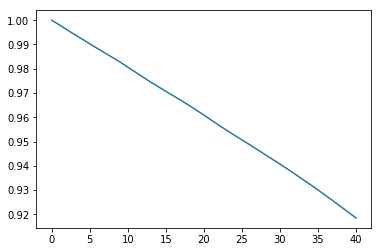

In [50]:
acf_Close=stattools.acf(Nifty_data['Close'])
plt.plot(acf_Close)
plt.show()

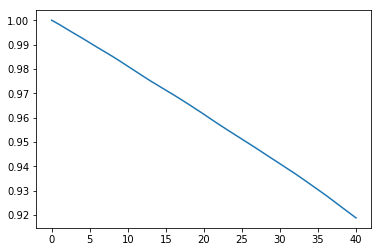

In [51]:
acf_High=stattools.acf(Nifty_data['High'])
plt.plot(acf_High)
plt.show()

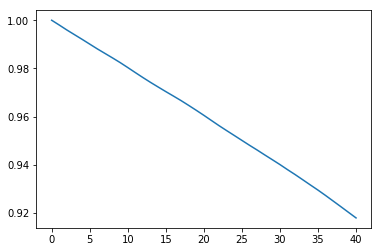

In [52]:
acf_Low=stattools.acf(Nifty_data['Low'])
plt.plot(acf_Low)
plt.show()

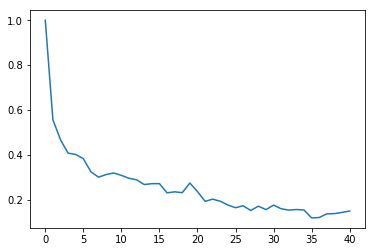

In [53]:
acf_Shares=stattools.acf(Nifty_data['Shares Traded'])
plt.plot(acf_Shares)
plt.show()

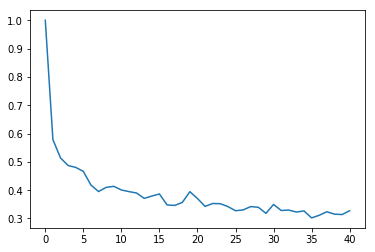

In [54]:
acf_Turnover=stattools.acf(Nifty_data['Turnover (Rs. Cr)'])
plt.plot(acf_Turnover)
plt.show()

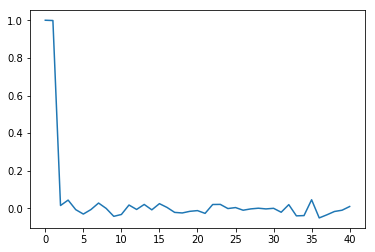

In [55]:
pacf_Open=stattools.pacf(Nifty_data['Open'])
plt.plot(pacf_Open)
plt.show()

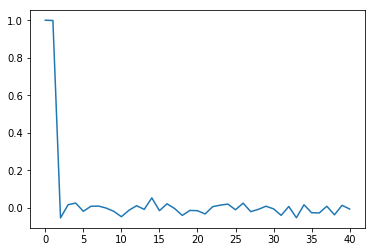

In [56]:
pacf_Close=stattools.pacf(Nifty_data['Close'])
plt.plot(pacf_Close)
plt.show()

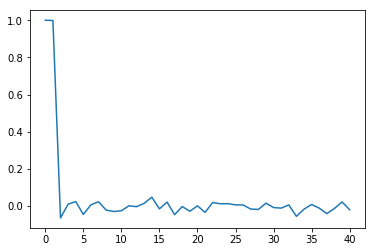

In [57]:
pacf_High=stattools.pacf(Nifty_data['High'])
plt.plot(pacf_High)
plt.show()

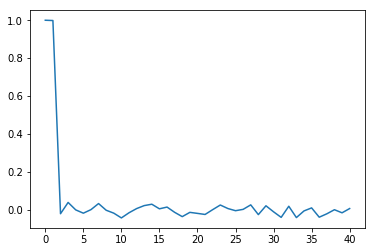

In [58]:
pacf_Low=stattools.pacf(Nifty_data['Low'])
plt.plot(pacf_Low)
plt.show()

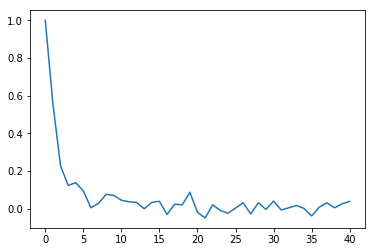

In [59]:
pacf_Shares=stattools.pacf(Nifty_data['Shares Traded'])
plt.plot(pacf_Shares)
plt.show()

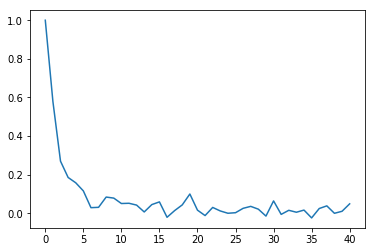

In [60]:
pacf_Turnover=stattools.pacf(Nifty_data['Turnover (Rs. Cr)'])
plt.plot(pacf_Turnover)
plt.show()